In [3]:
#!pip install pycaret
#!pip install shap


In [5]:
# import packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Mount Google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load the dataset**

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/employee.csv')

In [8]:
# check the first 5 rows
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [10]:
df.shape

(14999, 10)

In [11]:
df['left'].value_counts(normalize = True)

0    0.761917
1    0.238083
Name: left, dtype: float64

From the above we can see it is an imbalanced data

In [12]:
from pycaret.classification import setup

In [13]:
s = setup(data= df, target = 'left', remove_outliers = True, fix_imbalance= True)

,Description,Value
0,Session id,8651
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(19578, 21)"
5,Transformed train set shape,"(15078, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [14]:
# to get the X_train and Y_train, X_test and y_test from pycaret

X_train, y_train = s.X_train_transformed,s.y_train_transformed
X_test,y_test = s.X_test_transformed, s.y_test_transformed

In [15]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_technical,department_marketing,department_sales,department_support,department_accounting,department_hr,department_product_mng,department_IT,department_management,department_RandD,salary_medium,salary_low,salary_high
6528,0.81,0.95,3.0,212.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10387,0.76,0.61,4.0,172.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9720,0.53,0.97,4.0,254.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14336,0.11,0.92,6.0,260.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14519,0.41,0.48,2.0,145.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
y_train

6528     0
10387    0
9720     0
14336    1
14519    1
        ..
20097    1
20098    1
20099    1
20100    1
20101    1
Name: left, Length: 15078, dtype: int8

**Build the Model**

In [17]:
# create an instance of the model

rf = RandomForestClassifier()

#train the model
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [18]:
# Make prediction

y_pred = rf.predict(X_test)

In [19]:
# check the performance
clf_report = classification_report(y_test, y_pred)

print(f"Classification report: \n{clf_report}")

Classification report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.98      0.96      0.97      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



**Model Interpretability**

In [20]:
import shap

In [22]:
# create an instance of the shap explainer model
explainer = shap.Explainer(rf)

In [23]:
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_technical,department_marketing,department_sales,department_support,department_accounting,department_hr,department_product_mng,department_IT,department_management,department_RandD,salary_medium,salary_low,salary_high
2989,0.44,0.90,4.0,117.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5912,0.34,0.60,4.0,154.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
871,0.87,0.94,4.0,260.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9092,0.20,0.54,5.0,162.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13191,0.77,0.59,4.0,273.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [24]:
# reset the index
X_test = X_test.reset_index(drop = True)

In [25]:
# check
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_technical,department_marketing,department_sales,department_support,department_accounting,department_hr,department_product_mng,department_IT,department_management,department_RandD,salary_medium,salary_low,salary_high
0,0.44,0.90,4.0,117.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.34,0.60,4.0,154.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.87,0.94,4.0,260.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.20,0.54,5.0,162.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.77,0.59,4.0,273.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [26]:
# let us pick one observation
y_test.iloc[3] # check the third index

0

In [28]:
y_pred[0]

0

In [33]:
first_observation = X_test.iloc[[3]]

shap_values = explainer.shap_values(first_observation)

shap.initjs()

shap.force_plot(explainer.expected_value[1], shap_values[1], first_observation)

From the above you will notice that salary contributes more to the model decision.

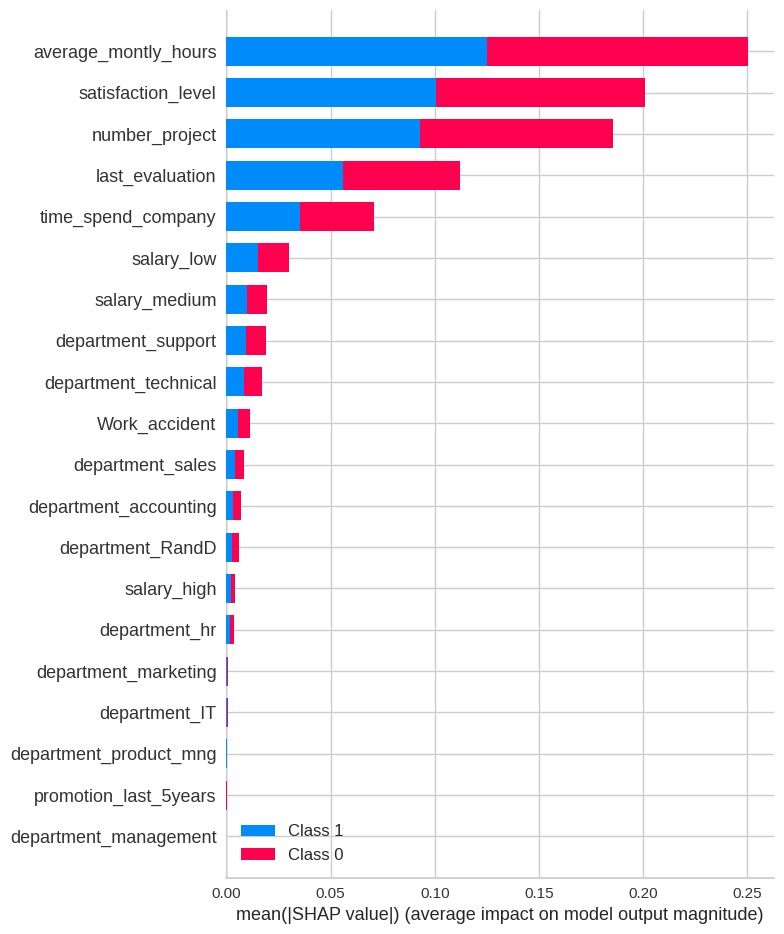

In [34]:
shap.initjs()
shap.summary_plot(shap_values, first_observation)

In [ ]:
# to get the explainer values for the observations in the data
# explainer.shap_values(X_test)